# Import the packages and upload the files

In [1]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import collections
import networkx as nx
import math
import numpy as np
import itertools
from collections import Counter
from google.colab import files
import operator

# Task 1

## Read the csv files

In [4]:
df_keyword = pd.read_csv('Keyword_data - Keyword_data.csv')
df_keyword=df_keyword.drop('Title', axis=1)#drop the column with the name title

In [5]:
df_keyword

Keyword 1  \
0                                                NaN   
1                                                NaN   
2                                             EQUITY   
3                        DIVERSIFICATION in industry   
4                      INTERORGANIZATIONAL relations   
..                                               ...   
61  INTERNATIONAL business enterprises -- Management   
62                              PERSONNEL management   
63                           COMPENSATION management   
64                            CROSS-functional teams   
65                  SERVICE industries -- Management   

                             Keyword 2               Keyword 3  \
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2             ORGANIZATIONAL sociology             PERFORMANCE   
3                    BUSINESS planning   PERFORMANCE standards   
4                 INTERGROUP relations  BUSINESS communication   
..                                 ...                     ...   
61  FOREIGN subsidiaries -- Management      EMPLOYEE selection   
62               COMPETITIVE advantage       BUSINESS networks   
63             ORGANIZATIONAL behavior    PERSONNEL management   
64              TEAMS in the workplace          GROUP identity   
65                  CUSTOMER relations   INDUSTRIAL management   

                      Keyword 4                 Keyword 5  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                 META-analysis             PSYCHOMETRICS   
3        EMPLOYEES -- Rating of         CORPORATE culture   
4                   INVESTMENTS             SUPPLY chains   
..                          ...                       ...   
61     EXECUTIVES -- Recruiting  ORGANIZATIONAL sociology   
62        INDUSTRIAL management        STRATEGIC planning   
63  HOSPITALS -- Administration                MANAGEMENT   
64      ORGANIZATIONAL behavior                MANAGEMENT   
65        PRODUCTION management        STRATEGIC planning   

                  Keyword 6                     Keyword 7  \
0                       NaN                           NaN   
1                       NaN                           NaN   
2   ORGANIZATIONAL research         FINANCIAL performance   
3        STRATEGIC planning  ORGANIZATIONAL effectiveness   
4      KNOWLEDGE management  INTERORGANIZATIONAL networks   
..                      ...                           ...   
61  ORGANIZATIONAL behavior                 AGENCY theory   
62          SOCIAL networks           RESOURCE management   
63    FINANCIAL performance          WAGE payment systems   
64              PERFORMANCE          PERSONNEL management   
65        CUSTOMER services                 LABOR process   

                            Keyword 8                     Keyword 9  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                       AGENCY theory  ORGANIZATIONAL effectiveness   
3                  MANAGEMENT science           MANAGEMENT research   
4                CORPORATE governance         GROUP decision making   
..                                ...                           ...   
61  RESOURCE-based theory of the firm          PERSONNEL management   
62  RESOURCE-based theory of the firm   HUMAN capital -- Management   
63                RESOURCE management  ORGANIZATIONAL effectiveness   
64              COMPETITIVE advantage  ORGANIZATIONAL effectiveness   
65            ORGANIZATIONAL behavior               DECISION making   

                         Keyword 10                             Keyword 11  \
0                               NaN                                    NaN   
1                               NaN                                    NaN   
2           ORGANIZATION

## Doing the necessary data cleaning process

In [6]:
myset=pd.unique(df_keyword[['Keyword 1', 'Keyword 2','Keyword 3','Keyword 4','Keyword 5','Keyword 6','Keyword 7','Keyword 8','Keyword 9', 'Keyword 10','Keyword 11','Keyword 12']].values.ravel())
myset = list(myset)
myset = [element for element in myset if str(element) != "nan"]
len(myset) # to show how many unique keywords are in the whole datasets so that we can create out matrix later

248

## Creating the matrix and dataframe

In [7]:
matrix = np.zeros((len(myset),len(myset)))# creating three for loop to create the adjacency matrix
for i in range(len(df_keyword)):
  for j in range(len(df_keyword.columns)-1):
    for k in range(j+1,len(df_keyword.columns)):
      if pd.notnull(df_keyword.iloc[i,j]) and pd.notnull(df_keyword.iloc[i,k]):
        matrix[myset.index(df_keyword.iloc[i,j])][myset.index(df_keyword.iloc[i,k])]+=1
        matrix[myset.index(df_keyword.iloc[i,k])][myset.index(df_keyword.iloc[i,j])]+=1
matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [8]:
df_matrix = pd.DataFrame(matrix)#Perform the converting process of making a numpy matrix into the dataframe
df_matrix=df_matrix.astype(int)# making all dataframe values into integer
df_matrix['ID'] = myset # adding a column by using the 248 unique keywords
df_matrix = df_matrix.set_index('ID') # set the ID as the index
df_matrix.columns = myset #set the column name as 248 unique keywords to make the original numpy matrix into a 248*248 dataframe
df_matrix

EQUITY  ORGANIZATIONAL sociology  PERFORMANCE  \
ID                                                                        
EQUITY                         0                         1            1   
ORGANIZATIONAL sociology       1                         0            2   
PERFORMANCE                    1                         2            0   
META-analysis                  1                         1            1   
PSYCHOMETRICS                  1                         1            1   
...                          ...                       ...          ...   
CUSTOMER relations             0                         0            0   
PRODUCTION management          0                         0            0   
LABOR process                  0                         0            0   
CUSTOMER orientation           0                         0            0   
MARKETING strategy             0                         0            0   

                          META-analysis  PSYCHOMETRICS  \
ID                                                       
EQUITY                                1              1   
ORGANIZATIONAL sociology              1              1   
PERFORMANCE                           1              1   
META-analysis                         0              1   
PSYCHOMETRICS                         1              0   
...                                 ...            ...   
CUSTOMER relations                    0              0   
PRODUCTION management                 0              0   
LABOR process                         0              0   
CUSTOMER orientation                  0              0   
MARKETING strategy                    0              0   

                          ORGANIZATIONAL research  FINANCIAL performance  \
ID                                                                         
EQUITY                                          1                      1   
ORGANIZATIONAL sociology                        2                      1   
PERFORMANCE                                     1                      1   
META-analysis                                   1                      1   
PSYCHOMETRICS                                   1                      1   
...                                           ...                    ...   
CUSTOMER relations                              0                      0   
PRODUCTION management                           0                      0   
LABOR process                                   0                      0   
CUSTOMER orientation                            0                      0   
MARKETING strategy                              0                      0   

                          AGENCY theory  ORGANIZATIONAL effectiveness  \
ID                                                                      
EQUITY                                1                             1   
ORGANIZATIONAL sociology              3                             4   
PERFORMANCE                           1                             3   
META-analysis                         1                             1   
PSYCHOMETRICS                         1                             1   
...                                 ...                           ...   
CUSTOMER relations                    0                             0   
PRODUCTION management                 0                             0   
LABOR process                         0                             0   
CUSTOMER orientation                  0                             0   
MARKETING strategy                    0                             0   

                          ORGANIZATIONAL behavior  ...  WAGE payment systems  \
ID                                                 ...                         
EQUITY                                          1  ...                     0   
ORGANIZATIONAL sociology                        6  ...                     0   
PERFORMANCE                         

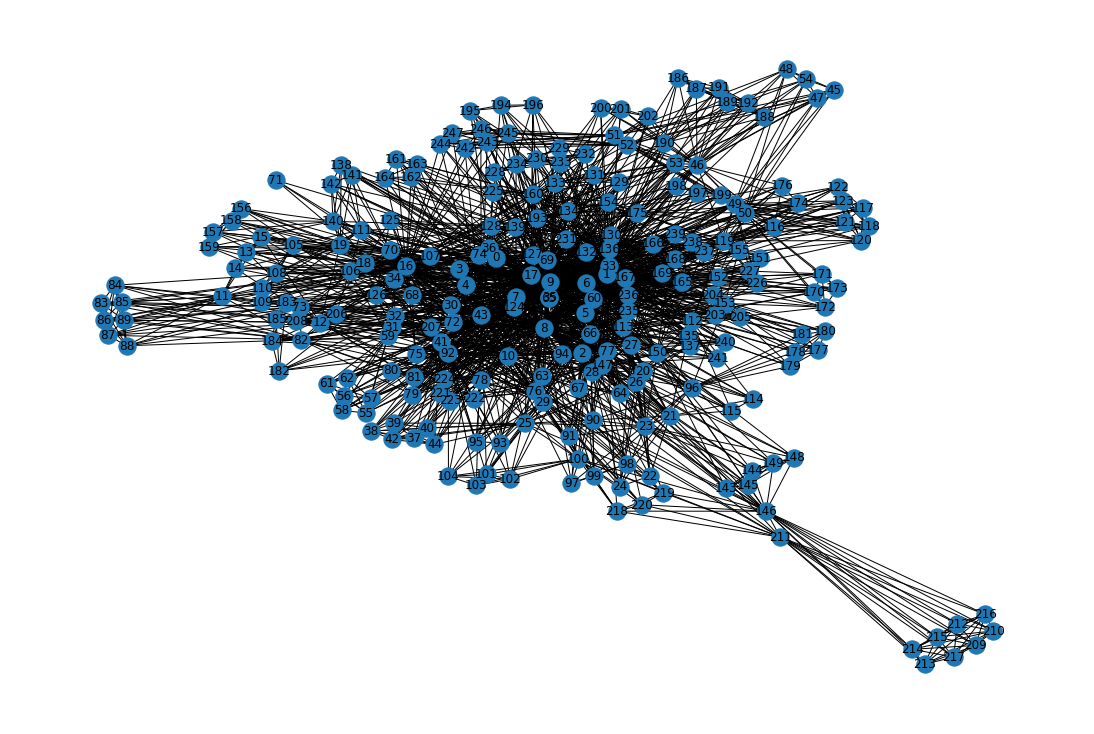

In [9]:
network = nx.from_numpy_matrix(np.matrix(df_matrix))# draw the network by using the dataframe that we have
plt.figure(figsize=(15, 10))
nx.draw(network,nx.spring_layout(network),with_labels=True)

## Doing the analysis over degree,strength and pairs etc.

In [10]:
degrees = df_matrix.astype(bool).sum(axis=0)#calculating the number of non-zero value in each column of the dataframe 
dict_degree = dict(map(lambda i,j : (i,j) , myset,degrees)) # Perform the mapping process to map the result from the previous step with the unique words and make them into dictionary format
dict_degree

{'EQUITY': 10,
 'ORGANIZATIONAL sociology': 66,
 'PERFORMANCE': 23,
 'META-analysis': 10,
 'PSYCHOMETRICS': 10,
 'ORGANIZATIONAL research': 24,
 'FINANCIAL performance': 19,
 'AGENCY theory': 38,
 'ORGANIZATIONAL effectiveness': 104,
 'ORGANIZATIONAL behavior': 166,
 'CORPORATE governance': 62,
 'DIVERSIFICATION in industry': 18,
 'BUSINESS planning': 29,
 'PERFORMANCE standards': 9,
 'EMPLOYEES -- Rating of': 9,
 'CORPORATE culture': 9,
 'STRATEGIC planning': 66,
 'MANAGEMENT science': 102,
 'MANAGEMENT research': 17,
 'PRODUCT management': 24,
 'INTERORGANIZATIONAL relations': 24,
 'INTERGROUP relations': 16,
 'BUSINESS communication': 9,
 'INVESTMENTS': 25,
 'SUPPLY chains': 9,
 'KNOWLEDGE management': 19,
 'INTERORGANIZATIONAL networks': 18,
 'GROUP decision making': 27,
 'INTELLECTUAL capital': 20,
 'EXECUTIVE compensation': 31,
 'WAGES': 17,
 'HUMAN capital': 17,
 'LABOR economics': 17,
 'PERSONNEL management': 93,
 'CONTINGENCY theory (Management)': 9,
 'COMPENSATION management'

In [11]:
top10_degrees = dict(sorted(dict_degree.items(), key=operator.itemgetter(1), reverse=True)[:10])#Perform the analysis process and get top 10 values and their keys(nodes) from the dictionary
top10_degrees

{'ORGANIZATIONAL behavior': 166,
 'ORGANIZATIONAL effectiveness': 104,
 'MANAGEMENT science': 102,
 'PERSONNEL management': 93,
 'DECISION making': 90,
 'ORGANIZATIONAL structure': 74,
 'ORGANIZATIONAL sociology': 66,
 'STRATEGIC planning': 66,
 'INDUSTRIAL management': 64,
 'CORPORATE governance': 62}

In [12]:
column_sum = df_matrix.sum(axis=0)#Perform the summation process for each column of the dataframe
pd_new = df_matrix#making a new dataframe
column_sum.to_dict()#convert the summation and the column name to dictionary by using column name as key
df_strength = pd_new.append(column_sum, ignore_index = True) # create a new dataframe and add the summation result to the last row 
df_strength

EQUITY  ORGANIZATIONAL sociology  PERFORMANCE  META-analysis  \
0         0                         1            1              1   
1         1                         0            2              1   
2         1                         2            0              1   
3         1                         1            1              0   
4         1                         1            1              1   
..      ...                       ...          ...            ...   
244       0                         0            0              0   
245       0                         0            0              0   
246       0                         0            0              0   
247       0                         0            0              0   
248      10                        96           29             10   

     PSYCHOMETRICS  ORGANIZATIONAL research  FINANCIAL performance  \
0                1                        1                      1   
1                1                        2                      1   
2                1                        1                      1   
3                1                        1                      1   
4                0                        1                      1   
..             ...                      ...                    ...   
244              0                        0                      0   
245              0                        0                      0   
246              0                        0                      0   
247              0                        0                      0   
248             10                       28                     21   

     AGENCY theory  ORGANIZATIONAL effectiveness  ORGANIZATIONAL behavior  \
0                1                             1                        1   
1                3                             4                        6   
2                1                             3                        2   
3                1                             1                        1   
4                1                             1                        1   
..             ...                           ...                      ...   
244              0                             0                        1   
245              0                             0                        1   
246              0                             0                        1   
247              0                             0                        1   
248             48                           144                      265   

     ...  WAGE payment systems  FINANCIAL management  CROSS-functional teams  \
0    ...                     0                     0                       0   
1    ...                     0                     0                       1   
2    ...                     0                     0                       1   
3    ...                     0                     0                       0   
4    ...                     0                     0                       0   
..   ...                   ...                   ...                     ...   
244  ...                     0                     0                       0   
245  ...                     0                     0                       0   
246  ...                     0                     0                       0   
247  ...                     0                     0                       0   
248  ...                    11                    11                      11   

     GROUP identity  SERVICE industries -- Management  CUSTOMER relations  \
0                 0                                 0                   0   
1                 1                                 0                   0   
2                 1                                 0                   0   
3                 0                                 0                   0   
4                 0                                 0           

In [13]:
new_dataframe_strength = df_strength[(df_strength.index == 248)]#doing the same process as the degree analysis
strength_series = new_dataframe_strength.squeeze()
dict_strength = dict(map(lambda i,j : (i,j) , myset,strength_series))
dict_strength

{'EQUITY': 10,
 'ORGANIZATIONAL sociology': 96,
 'PERFORMANCE': 29,
 'META-analysis': 10,
 'PSYCHOMETRICS': 10,
 'ORGANIZATIONAL research': 28,
 'FINANCIAL performance': 21,
 'AGENCY theory': 48,
 'ORGANIZATIONAL effectiveness': 144,
 'ORGANIZATIONAL behavior': 265,
 'CORPORATE governance': 85,
 'DIVERSIFICATION in industry': 20,
 'BUSINESS planning': 31,
 'PERFORMANCE standards': 9,
 'EMPLOYEES -- Rating of': 9,
 'CORPORATE culture': 9,
 'STRATEGIC planning': 80,
 'MANAGEMENT science': 136,
 'MANAGEMENT research': 19,
 'PRODUCT management': 28,
 'INTERORGANIZATIONAL relations': 27,
 'INTERGROUP relations': 17,
 'BUSINESS communication': 9,
 'INVESTMENTS': 25,
 'SUPPLY chains': 9,
 'KNOWLEDGE management': 20,
 'INTERORGANIZATIONAL networks': 19,
 'GROUP decision making': 30,
 'INTELLECTUAL capital': 20,
 'EXECUTIVE compensation': 36,
 'WAGES': 18,
 'HUMAN capital': 18,
 'LABOR economics': 18,
 'PERSONNEL management': 126,
 'CONTINGENCY theory (Management)': 9,
 'COMPENSATION management

In [14]:
top10_Strength = dict(sorted(dict_strength.items(), key=operator.itemgetter(1), reverse=True)[:10])# showing the top 10 nodes with their strength
top10_Strength

{'ORGANIZATIONAL behavior': 265,
 'ORGANIZATIONAL effectiveness': 144,
 'MANAGEMENT science': 136,
 'PERSONNEL management': 126,
 'DECISION making': 112,
 'ORGANIZATIONAL structure': 107,
 'ORGANIZATIONAL sociology': 96,
 'CORPORATE governance': 85,
 'INDUSTRIAL management': 84,
 'STRATEGIC planning': 80}

In [15]:
new_df = df_matrix#create a new dataframe so that we can add strength and degree into the dataframe in order to do the analysis over the average of strength stuff
strength_list = df_strength.loc[248,:].values.tolist()
new_df['strength'] = strength_list
degree_list = list(dict_degree.values())
new_df['degree'] = degree_list
count = new_df.groupby('degree').size()
count_list = count.values
new_df 

EQUITY  ORGANIZATIONAL sociology  PERFORMANCE  \
ID                                                                        
EQUITY                         0                         1            1   
ORGANIZATIONAL sociology       1                         0            2   
PERFORMANCE                    1                         2            0   
META-analysis                  1                         1            1   
PSYCHOMETRICS                  1                         1            1   
...                          ...                       ...          ...   
CUSTOMER relations             0                         0            0   
PRODUCTION management          0                         0            0   
LABOR process                  0                         0            0   
CUSTOMER orientation           0                         0            0   
MARKETING strategy             0                         0            0   

                          META-analysis  PSYCHOMETRICS  \
ID                                                       
EQUITY                                1              1   
ORGANIZATIONAL sociology              1              1   
PERFORMANCE                           1              1   
META-analysis                         0              1   
PSYCHOMETRICS                         1              0   
...                                 ...            ...   
CUSTOMER relations                    0              0   
PRODUCTION management                 0              0   
LABOR process                         0              0   
CUSTOMER orientation                  0              0   
MARKETING strategy                    0              0   

                          ORGANIZATIONAL research  FINANCIAL performance  \
ID                                                                         
EQUITY                                          1                      1   
ORGANIZATIONAL sociology                        2                      1   
PERFORMANCE                                     1                      1   
META-analysis                                   1                      1   
PSYCHOMETRICS                                   1                      1   
...                                           ...                    ...   
CUSTOMER relations                              0                      0   
PRODUCTION management                           0                      0   
LABOR process                                   0                      0   
CUSTOMER orientation                            0                      0   
MARKETING strategy                              0                      0   

                          AGENCY theory  ORGANIZATIONAL effectiveness  \
ID                                                                      
EQUITY                                1                             1   
ORGANIZATIONAL sociology              3                             4   
PERFORMANCE                           1                             3   
META-analysis                         1                             1   
PSYCHOMETRICS                         1                             1   
...                                 ...                           ...   
CUSTOMER relations                    0                             0   
PRODUCTION management                 0                             0   
LABOR process                         0                             0   
CUSTOMER orientation                  0                             0   
MARKETING strategy                    0                             0   

                          ORGANIZATIONAL behavior  ...  \
ID                                                 ...   
EQUITY                                          1  ...   
ORGANIZATIONAL sociology                        6  ...   
PERFORMANCE                                     2  ...   
META-analysis                                   1  ...   
PSYCHOME

In [16]:
dict_pairs = {}# create two for loops so that we can have all of the pairs in the dataframe and put them into a dictinary by using the two nodes as key and number of pairs as value
for x in df_matrix.index:
  for y in df_matrix.columns:
    score = df_matrix.loc[x,y]
    if (x,y) in dict_pairs or (y,x) in dict_pairs:
      pass
    else:
      dict_pairs[(x,y)] = score 
dict_pairs 

{('EQUITY', 'EQUITY'): 0,
 ('EQUITY', 'ORGANIZATIONAL sociology'): 1,
 ('EQUITY', 'PERFORMANCE'): 1,
 ('EQUITY', 'META-analysis'): 1,
 ('EQUITY', 'PSYCHOMETRICS'): 1,
 ('EQUITY', 'ORGANIZATIONAL research'): 1,
 ('EQUITY', 'FINANCIAL performance'): 1,
 ('EQUITY', 'AGENCY theory'): 1,
 ('EQUITY', 'ORGANIZATIONAL effectiveness'): 1,
 ('EQUITY', 'ORGANIZATIONAL behavior'): 1,
 ('EQUITY', 'CORPORATE governance'): 1,
 ('EQUITY', 'DIVERSIFICATION in industry'): 0,
 ('EQUITY', 'BUSINESS planning'): 0,
 ('EQUITY', 'PERFORMANCE standards'): 0,
 ('EQUITY', 'EMPLOYEES -- Rating of'): 0,
 ('EQUITY', 'CORPORATE culture'): 0,
 ('EQUITY', 'STRATEGIC planning'): 0,
 ('EQUITY', 'MANAGEMENT science'): 0,
 ('EQUITY', 'MANAGEMENT research'): 0,
 ('EQUITY', 'PRODUCT management'): 0,
 ('EQUITY', 'INTERORGANIZATIONAL relations'): 0,
 ('EQUITY', 'INTERGROUP relations'): 0,
 ('EQUITY', 'BUSINESS communication'): 0,
 ('EQUITY', 'INVESTMENTS'): 0,
 ('EQUITY', 'SUPPLY chains'): 0,
 ('EQUITY', 'KNOWLEDGE management

In [17]:
top10_pairs = dict(sorted(dict_pairs.items(), key=operator.itemgetter(1), reverse=True)[:13])# because there are 3 more nodes with 5 pairs between them so that we have to show 13 values
top10_pairs

{('ORGANIZATIONAL behavior', 'strength'): 265,
 ('ORGANIZATIONAL behavior', 'degree'): 166,
 ('ORGANIZATIONAL effectiveness', 'strength'): 144,
 ('MANAGEMENT science', 'strength'): 136,
 ('PERSONNEL management', 'strength'): 126,
 ('DECISION making', 'strength'): 112,
 ('ORGANIZATIONAL structure', 'strength'): 107,
 ('ORGANIZATIONAL effectiveness', 'degree'): 104,
 ('MANAGEMENT science', 'degree'): 102,
 ('ORGANIZATIONAL sociology', 'strength'): 96,
 ('PERSONNEL management', 'degree'): 93,
 ('DECISION making', 'degree'): 90,
 ('CORPORATE governance', 'strength'): 85}

In [18]:
df_avg = df_matrix.groupby(['degree'])['strength'].sum()# doing the group by process and calculate the average strength by using the strength/count of each different value of degree
df_avg = pd.DataFrame(df_avg)
df_avg['count'] = count_list
df_avg ['avg_strength'] = df_avg['strength']/df_avg['count']
df_avg = df_avg.reset_index()
df_avg

degree  strength  count  avg_strength
0        4         4      1      4.000000
1        7        21      3      7.000000
2        8        40      5      8.000000
3        9       738     82      9.000000
4       10       240     24     10.000000
5       11       495     45     11.000000
6       14        29      2     14.500000
7       15        16      1     16.000000
8       16        91      5     18.200000
9       17       236     13     18.153846
10      18       192     10     19.200000
11      19       123      6     20.500000
12      20       102      5     20.400000
13      21        65      3     21.666667
14      23        55      2     27.500000
15      24        83      3     27.666667
16      25        54      2     27.000000
17      26       121      4     30.250000
18      27        90      3     30.000000
19      28        30      1     30.000000
20      29        62      2     31.000000
21      31       111      3     37.000000
22      32       108      3     36.000000
23      35        44      1     44.000000
24      37        91      2     45.500000
25      38        48      1     48.000000
26      41        53      1     53.000000
27      42        47      1     47.000000
28      46        57      1     57.000000
29      48        60      1     60.000000
30      49        59      1     59.000000
31      55        78      1     78.000000
32      62        85      1     85.000000
33      64        84      1     84.000000
34      66       176      2     88.000000
35      74       107      1    107.000000
36      90       112      1    112.000000
37      93       126      1    126.000000
38     102       136      1    136.000000
39     104       144      1    144.000000
40     166       265      1    265.000000

Text(0, 0.5, 'avg_strength')

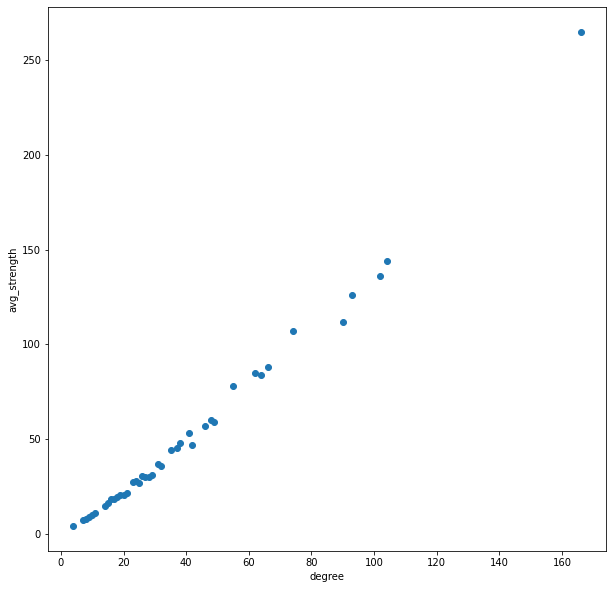

In [19]:
plt.figure(figsize=(10,10)) #draw the plot by using degree as x-axis and average strength as y-axis
plt.scatter(df_avg['degree'], df_avg['avg_strength'])
plt.xlabel('degree')
plt.ylabel('avg_strength')

# Task 2

In [20]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
All_punct = '''!()-[]{};:'"\,<>./?#$%^&*_~'''# Cleaning the data.

def removal(tweet):
  tweet = tweet.lower()  # Coverting everything to lower case.
  tweet = re.sub("'", "", tweet)  # removing the apostrophes.
  tweet = re.sub('@[^\s]+','',tweet)# Removing the mentions.
  tweet = re.sub('http[^\s]+','',tweet)# Removing the links.
  tweet = re.sub('#[A-Za-z0-9_]+','', tweet)# Removing the hashes.
  tweet = re.sub("[^a-z0-9]"," ", tweet) # Removing all the unnecessary characters.
  for elements in tweet:# Removing the punctuation marks.
    if elements in All_punct:
      tweet = tweet.replace(elements, "")

  return tweet

## 2017

In [22]:
task_2017 = pd.read_csv('2017.csv')
task_2017

Unnamed: 0                  id     conversation_id    created_at  \
0              0  945814723521417217  945712432416137217  1.514335e+12   
1              1  945749747129659392  945712432416137217  1.514319e+12   
2              2  945748731197980672  945712432416137217  1.514319e+12   
3              3  945730195113365504  945727773493968896  1.514315e+12   
4              4  945729852874694656  945712432416137217  1.514315e+12   
...          ...                 ...                 ...           ...   
3162        3162  142881284019060736  142881284019060736  1.322901e+12   
3163        3163  142880871391838208  142880871391838208  1.322900e+12   
3164        3164  142188458125963264  142188458125963264  1.322735e+12   
3165        3165  142179928203460608  142179928203460608  1.322733e+12   
3166        3166         15434727182         15434727182  1.275676e+12   

                     date  timezone  place  \
0     2017-12-27 00:32:57         0    NaN   
1     2017-12-26 20:14:45         0    NaN   
2     2017-12-26 20:10:43         0    NaN   
3     2017-12-26 18:57:03         0    NaN   
4     2017-12-26 18:55:42         0    NaN   
...                   ...       ...    ...   
3162  2011-12-03 08:22:07         0    NaN   
3163  2011-12-03 08:20:28         0    NaN   
3164  2011-12-01 10:29:04         0    NaN   
3165  2011-12-01 09:55:11         0    NaN   
3166  2010-06-04 18:31:57         0    NaN   

                                                  tweet language hashtags  \
0                   @neilsiegel @Tesla Coming very soon       en       []   
1          @Kreative Vastly better maps/nav coming soon       en       []   
2                                          @dd_hogan Ok      und       []   
3                                    @Jason @Tesla Sure       en       []   
4     @kabirakhtar Yeah, it’s terrible. Had to upgra...       en       []   
...                                                 ...      ...      ...   
3162                  That was a total non sequitur btw       en       []   
3163  Great Voltaire quote, arguably better than Twa...       en       []   
3164  I made the volume on the Model S  http://t.co/...       en       []   
3165  Went to Iceland on Sat to ride bumper cars on ...       en       []   
3166  Please ignore prior tweets, as that was someon...       en       []   

      ... geo  source  user_rt_id user_rt retweet_id  \
0     ... NaN     NaN         NaN     NaN        NaN   
1     ... NaN     NaN         NaN     NaN        NaN   
2     ... NaN     NaN         NaN     NaN        NaN   
3     ... NaN     NaN         NaN     NaN        NaN   
4     ... NaN     NaN         NaN     NaN        NaN   
...   ...  ..     ...         ...     ...        ...   
3162  ... NaN     NaN         NaN     NaN        NaN   
3163  ... NaN     NaN         NaN     NaN        NaN   
3164  ... NaN     NaN         NaN     NaN        NaN   
3165  ... NaN     NaN         NaN     NaN        NaN   
3166  ... NaN     NaN         NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'neilsiegel', 'name': 'Neil S...           NaN   
1     [{'screen_name': 'Kreative', 'name': 'Leslie',...           NaN   
2     [{'screen_name': 'dd_hogan', 'name': 'Live4EVD...           NaN   
3     [{'screen_name': 'Jason', 'name': 'jason@calac...           NaN   
4     [{'screen_name': 'kabirakhtar', 'name': 'kabir...           NaN   
...                                                 ...           ...   
3162                                                 []           NaN   
3163                                                 []           NaN   
3164                                                 []           NaN   
3165                                                 []           NaN   
3166                                                 []           NaN   

     translate trans_src trans_dest  
0          NaN       NaN        NaN  
1          Na

In [23]:
task_2017['tweet'] = task_2017['tweet'].apply(removal)# Cleaning the data.
task_2017

Unnamed: 0                  id     conversation_id    created_at  \
0              0  945814723521417217  945712432416137217  1.514335e+12   
1              1  945749747129659392  945712432416137217  1.514319e+12   
2              2  945748731197980672  945712432416137217  1.514319e+12   
3              3  945730195113365504  945727773493968896  1.514315e+12   
4              4  945729852874694656  945712432416137217  1.514315e+12   
...          ...                 ...                 ...           ...   
3162        3162  142881284019060736  142881284019060736  1.322901e+12   
3163        3163  142880871391838208  142880871391838208  1.322900e+12   
3164        3164  142188458125963264  142188458125963264  1.322735e+12   
3165        3165  142179928203460608  142179928203460608  1.322733e+12   
3166        3166         15434727182         15434727182  1.275676e+12   

                     date  timezone  place  \
0     2017-12-27 00:32:57         0    NaN   
1     2017-12-26 20:14:45         0    NaN   
2     2017-12-26 20:10:43         0    NaN   
3     2017-12-26 18:57:03         0    NaN   
4     2017-12-26 18:55:42         0    NaN   
...                   ...       ...    ...   
3162  2011-12-03 08:22:07         0    NaN   
3163  2011-12-03 08:20:28         0    NaN   
3164  2011-12-01 10:29:04         0    NaN   
3165  2011-12-01 09:55:11         0    NaN   
3166  2010-06-04 18:31:57         0    NaN   

                                                  tweet language hashtags  \
0                                      coming very soon       en       []   
1                    vastly better maps nav coming soon       en       []   
2                                                    ok      und       []   
3                                                  sure       en       []   
4      yeah  it s terrible  had to upgrade old linux...       en       []   
...                                                 ...      ...      ...   
3162                  that was a total non sequitur btw       en       []   
3163  great voltaire quote  arguably better than twa...       en       []   
3164  i made the volume on the model s   go to 11   ...       en       []   
3165  went to iceland on sat to ride bumper cars on ...       en       []   
3166  please ignore prior tweets  as that was someon...       en       []   

      ... geo  source  user_rt_id user_rt retweet_id  \
0     ... NaN     NaN         NaN     NaN        NaN   
1     ... NaN     NaN         NaN     NaN        NaN   
2     ... NaN     NaN         NaN     NaN        NaN   
3     ... NaN     NaN         NaN     NaN        NaN   
4     ... NaN     NaN         NaN     NaN        NaN   
...   ...  ..     ...         ...     ...        ...   
3162  ... NaN     NaN         NaN     NaN        NaN   
3163  ... NaN     NaN         NaN     NaN        NaN   
3164  ... NaN     NaN         NaN     NaN        NaN   
3165  ... NaN     NaN         NaN     NaN        NaN   
3166  ... NaN     NaN         NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'neilsiegel', 'name': 'Neil S...           NaN   
1     [{'screen_name': 'Kreative', 'name': 'Leslie',...           NaN   
2     [{'screen_name': 'dd_hogan', 'name': 'Live4EVD...           NaN   
3     [{'screen_name': 'Jason', 'name': 'jason@calac...           NaN   
4     [{'screen_name': 'kabirakhtar', 'name': 'kabir...           NaN   
...                                                 ...           ...   
3162                                                 []           NaN   
3163                                                 []           NaN   
3164                                                 []           NaN   
3165                                                 []           NaN   
3166                                                 []           NaN   

     translate trans_src trans_dest  
0          NaN       NaN        NaN  
1          Na

In [24]:
words_list = task_2017.tweet.values.tolist()# Converting the dataframe column to a list.
print(words_list)

['  coming very soon', ' vastly better maps nav coming soon', ' ok', '  sure', ' yeah  it s terrible  had to upgrade old linux os and a bunch of drivers first  major browser upgrades coming to all cars in a few months  note  will be slower at first until code is optimized ', '  similar total size  maybe slightly bigger to account for a really gamechanging  i think  feature i d like to add ', ' sustainable energy production with solar and batteries will grow much faster than auto on a percentage basis  that will be a big focus next year  with primary remaining model 3 ramp ', ' was gonna say we ll do all but the last  but that last one sounds like good  cheesy fun   ', ' should be in next update', ' done', ' i promise that we will make a pickup truck right after model y  have had the core design engineering elements in my mind for almost 5 years  am dying to build it ', ' sorry for the delay  we have the most advanced ai neural net of any consumer product by far  so it s going through e

In [25]:
new_df = pd.DataFrame(words_list)# Creating a new dataframe.
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0                                      coming very soon   
1                    vastly better maps nav coming soon   
2                                                    ok   
3                                                  sure   
4      yeah  it s terrible  had to upgrade old linux...   
...                                                 ...   
3162                  that was a total non sequitur btw   
3163  great voltaire quote  arguably better than twa...   
3164  i made the volume on the model s   go to 11   ...   
3165  went to iceland on sat to ride bumper cars on ...   
3166  please ignore prior tweets  as that was someon...   

                                tweet_without_stopwords  
0                                           coming soon  
1                    vastly better maps nav coming soon  
2                                                    ok  
3                                                  sure  
4     yeah terrible upgrade old linux os bunch drive...  
...                                                 ...  
3162                             total non sequitur btw  
3163  great voltaire quote arguably better twain hea...  
3164  made volume model go 11 need work miniature st...  
3165  went iceland sat ride bumper cars ice country ...  
3166  please ignore prior tweets someone pretending ...  

[3167 rows x 2 columns]

In [26]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()# Calculating the word frequencies.
result = result.to_dict()# Converting the result to a dictionary.

<BarContainer object of 6248 artists>

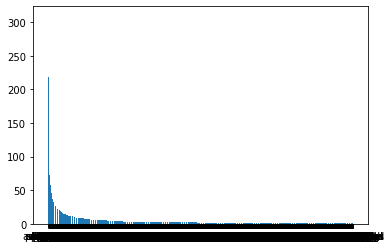

In [27]:
plt.bar(result.keys(), result.values()) # Plotting the bar graph.

In [28]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)# Top 10 word frequencies. 
result_top_10 = result_top_10.to_dict()# Converting the result to a dictionary
result_top_10

{'tesla': 308,
 'amp': 219,
 'model': 208,
 'good': 171,
 'rocket': 149,
 'like': 137,
 'yes': 132,
 'launch': 112,
 'next': 103,
 '3': 101}

<BarContainer object of 10 artists>

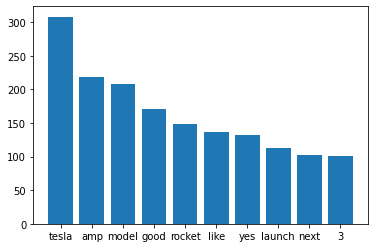

In [29]:
plt.bar(result_top_10.keys(), result_top_10.values())# Plotting the bar graph.

[Text(0.5, 1.0, 'Word frequency for 2017 elon tweets')]

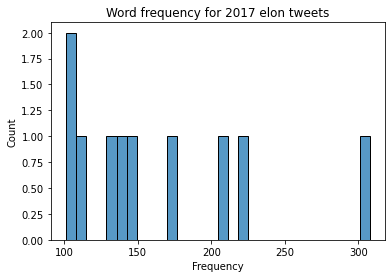

In [30]:
import seaborn as sns# Plotting the histogram.
word_freq_2017 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2017,bins=30).set(title="Word frequency for 2017 elon tweets")

In [31]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()# Creating a list for bigrams.

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))# Printing the bigrams.

The formed bigrams are : [('coming', 'soon'), ('vastly', 'better'), ('better', 'maps'), ('maps', 'nav'), ('nav', 'coming'), ('coming', 'soon'), ('yeah', 'terrible'), ('terrible', 'upgrade'), ('upgrade', 'old'), ('old', 'linux'), ('linux', 'os'), ('os', 'bunch'), ('bunch', 'drivers'), ('drivers', 'first'), ('first', 'major'), ('major', 'browser'), ('browser', 'upgrades'), ('upgrades', 'coming'), ('coming', 'cars'), ('cars', 'months'), ('months', 'note'), ('note', 'slower'), ('slower', 'first'), ('first', 'code'), ('code', 'optimized'), ('similar', 'total'), ('total', 'size'), ('size', 'maybe'), ('maybe', 'slightly'), ('slightly', 'bigger'), ('bigger', 'account'), ('account', 'really'), ('really', 'gamechanging'), ('gamechanging', 'think'), ('think', 'feature'), ('feature', 'like'), ('like', 'add'), ('sustainable', 'energy'), ('energy', 'production'), ('production', 'solar'), ('solar', 'batteries'), ('batteries', 'grow'), ('grow', 'much'), ('much', 'faster'), ('faster', 'auto'), ('auto',

In [32]:
bigram_counts = collections.Counter(res)# Frequencies of the bigrams.

bigram_counts

Counter({('coming', 'soon'): 27,
         ('vastly', 'better'): 1,
         ('better', 'maps'): 1,
         ('maps', 'nav'): 1,
         ('nav', 'coming'): 1,
         ('yeah', 'terrible'): 1,
         ('terrible', 'upgrade'): 1,
         ('upgrade', 'old'): 1,
         ('old', 'linux'): 1,
         ('linux', 'os'): 2,
         ('os', 'bunch'): 1,
         ('bunch', 'drivers'): 1,
         ('drivers', 'first'): 1,
         ('first', 'major'): 1,
         ('major', 'browser'): 1,
         ('browser', 'upgrades'): 1,
         ('upgrades', 'coming'): 1,
         ('coming', 'cars'): 1,
         ('cars', 'months'): 1,
         ('months', 'note'): 1,
         ('note', 'slower'): 1,
         ('slower', 'first'): 1,
         ('first', 'code'): 1,
         ('code', 'optimized'): 1,
         ('similar', 'total'): 1,
         ('total', 'size'): 1,
         ('size', 'maybe'): 1,
         ('maybe', 'slightly'): 1,
         ('slightly', 'bigger'): 1,
         ('bigger', 'account'): 1,
         ('acc

In [33]:
new_dict = dict(bigram_counts)# Creating a new data frame with the bigrams and their frequency.

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0              (coming, soon)     27
1            (vastly, better)      1
2              (better, maps)      1
3                 (maps, nav)      1
4               (nav, coming)      1
...                       ...    ...
20590         (ignore, prior)      1
20591         (prior, tweets)      1
20592       (tweets, someone)      1
20593   (someone, pretending)      1
20594  (pretending, actually)      1

[20595 rows x 2 columns]

In [34]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])# Taking top 100 bigrams.

bigram_df

bigram  count
0         (model, 3)     57
1        (falcon, 9)     50
2         (model, x)     32
3     (coming, soon)     27
4   (space, station)     25
..               ...    ...
95  (tesla, service)      5
96  (hw2, autopilot)      5
97   (monty, python)      5
98      (look, good)      5
99    (many, people)      5

[100 rows x 2 columns]

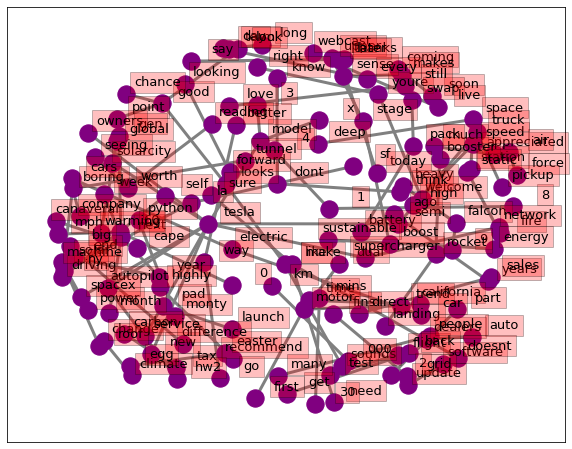

In [35]:
d = bigram_df.set_index('bigram').T.to_dict('records')# Creating the bigram graph.

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [36]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)# Sorting the bigrams in descending order by word frequencies.
sorted_df

All Bigrams  Count
0                  (model, 3)     57
1                 (falcon, 9)     50
2                  (model, x)     32
3              (coming, soon)     27
4            (space, station)     25
...                       ...    ...
20590         (renaming, car)      1
20591         (try, renaming)      1
20592             (also, try)      1
20593              (works, x)      1
20594  (pretending, actually)      1

[20595 rows x 2 columns]

In [37]:
sorted_df['Rank'] = sorted_df.index + 1# Adding a new column to the data frame.
sorted_df

All Bigrams  Count   Rank
0                  (model, 3)     57      1
1                 (falcon, 9)     50      2
2                  (model, x)     32      3
3              (coming, soon)     27      4
4            (space, station)     25      5
...                       ...    ...    ...
20590         (renaming, car)      1  20591
20591         (try, renaming)      1  20592
20592             (also, try)      1  20593
20593              (works, x)      1  20594
20594  (pretending, actually)      1  20595

[20595 rows x 3 columns]

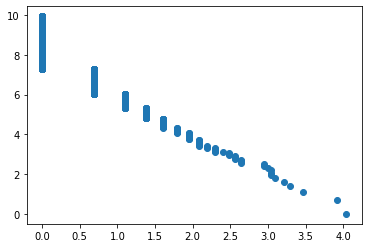

In [38]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

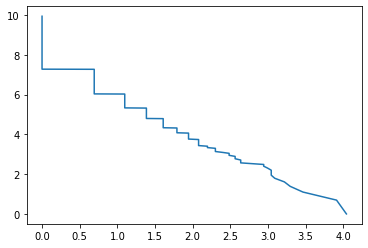

In [39]:
plt.plot(xlog, ylog)

## 2018

In [40]:
task_2018 = pd.read_csv('2018.csv')
task_2018['tweet'] = task_2018['tweet'].apply(removal)
task_2018

Unnamed: 0                   id      conversation_id    created_at  \
0              0  1079469237230493696  1079155749077475328  1.546200e+12   
1              1  1079459047252709377  1079457030060924928  1.546198e+12   
2              2  1078716366591483904  1078716366591483904  1.546021e+12   
3              3  1078529476018008064  1078529330492321793  1.545976e+12   
4              4  1078395092090699776  1078383289356902401  1.545944e+12   
...          ...                  ...                  ...           ...   
2280        2280   949831212326993920   949831212326993920  1.515292e+12   
2281        2281   949075535459528705   949075475036487680  1.515112e+12   
2282        2282   949075475036487680   949075475036487680  1.515112e+12   
2283        2283   948469610944241664   948469610944241664  1.514968e+12   
2284        2284   948428274467618816   948428274467618816  1.514958e+12   

                     date  timezone  place  \
0     2018-12-30 20:08:16         0    NaN   
1     2018-12-30 19:27:46         0    NaN   
2     2018-12-28 18:16:38         0    NaN   
3     2018-12-28 05:53:59         0    NaN   
4     2018-12-27 21:00:00         0    NaN   
...                   ...       ...    ...   
2280  2018-01-07 02:33:02         0    NaN   
2281  2018-01-05 00:30:15         0    NaN   
2282  2018-01-05 00:30:00         0    NaN   
2283  2018-01-03 08:22:31         0    NaN   
2284  2018-01-03 05:38:16         0    NaN   

                                                  tweet language hashtags  \
0       thanks tesla owners in china  looking forwar...       en       []   
1      turns out if you take dayquil  you exit the m...       en       []   
2     excited to have larry ellison  amp  kathleen w...       en       []   
3                                                    ok      und       []   
4                           tesla team did a great job        en       []   
...                                                 ...      ...      ...   
2280  gonna put an old school drive in  roller skate...       en       []   
2281                                                         und       []   
2282                       falcon heavy goes vertical         en       []   
2283  using a neural net to detect rain using camera...       en       []   
2284  come work at the biggest  amp  most advanced f...       en       []   

      ... geo  source  user_rt_id user_rt retweet_id  \
0     ... NaN     NaN         NaN     NaN        NaN   
1     ... NaN     NaN         NaN     NaN        NaN   
2     ... NaN     NaN         NaN     NaN        NaN   
3     ... NaN     NaN         NaN     NaN        NaN   
4     ... NaN     NaN         NaN     NaN        NaN   
...   ...  ..     ...         ...     ...        ...   
2280  ... NaN     NaN         NaN     NaN        NaN   
2281  ... NaN     NaN         NaN     NaN        NaN   
2282  ... NaN     NaN         NaN     NaN        NaN   
2283  ... NaN     NaN         NaN     NaN        NaN   
2284  ... NaN     NaN         NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'vincent13031925', 'name': 'V...           NaN   
1     [{'screen_name': 'Grimezsz', 'name': '☾laire d...           NaN   
2                                                    []           NaN   
3     [{'screen_name': 'Tesla', 'name': 'Tesla', 'id...           NaN   
4     [{'screen_name': 'westcoastbill', 'name': 'bil...           NaN   
...                                                 ...           ...   
2280                                                 []           NaN   
2281                                                 []           NaN   
2282                                                 []           NaN   
2283                                                 []           NaN   
2284                                                 []           NaN   

     translate trans_src trans_dest  
0          NaN       NaN   

In [41]:
words_list = task_2018.tweet.values.tolist()
new_df = pd.DataFrame(words_list)
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0       thanks tesla owners in china  looking forwar...   
1      turns out if you take dayquil  you exit the m...   
2     excited to have larry ellison  amp  kathleen w...   
3                                                    ok   
4                           tesla team did a great job    
...                                                 ...   
2280  gonna put an old school drive in  roller skate...   
2281                                                      
2282                       falcon heavy goes vertical     
2283  using a neural net to detect rain using camera...   
2284  come work at the biggest  amp  most advanced f...   

                                tweet_without_stopwords  
0     thanks tesla owners china looking forward visi...  
1                        turns take dayquil exit matrix  
2     excited larry ellison amp kathleen wilson thom...  
3                                                    ok  
4                                  tesla team great job  
...                                                 ...  
2280  gonna put old school drive roller skates amp r...  
2281                                                     
2282                         falcon heavy goes vertical  
2283  using neural net detect rain using cameras ded...  
2284  come work biggest amp advanced factory earth l...  

[2285 rows x 2 columns]

In [42]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
result = result.to_dict()
result

{'amp': 527,
 'tesla': 291,
 'car': 121,
 '3': 116,
 'yes': 108,
 'good': 102,
 'model': 98,
 'like': 95,
 'would': 77,
 'people': 74,
 'even': 65,
 'next': 64,
 'great': 62,
 'make': 60,
 'time': 59,
 'cars': 55,
 'work': 55,
 'better': 54,
 'love': 54,
 'get': 53,
 'one': 53,
 'soon': 50,
 'right': 50,
 'true': 49,
 'need': 49,
 'also': 49,
 'thanks': 49,
 'actually': 48,
 'much': 48,
 'production': 48,
 'year': 47,
 'high': 47,
 'new': 46,
 'us': 45,
 'think': 45,
 'exactly': 44,
 'team': 44,
 'know': 43,
 'yeah': 42,
 'way': 41,
 'use': 41,
 'maybe': 41,
 'falcon': 39,
 'really': 39,
 'air': 39,
 'spacex': 39,
 'could': 38,
 'coming': 38,
 'week': 38,
 'want': 38,
 'company': 37,
 'many': 37,
 'years': 37,
 'going': 36,
 'super': 36,
 'long': 35,
 '2': 35,
 'best': 35,
 'boring': 35,
 'first': 35,
 'made': 34,
 'ok': 34,
 '1': 34,
 'future': 33,
 'media': 32,
 'water': 32,
 'point': 32,
 'drive': 32,
 'performance': 31,
 'go': 31,
 'almost': 30,
 'back': 30,
 'x': 30,
 'free': 30,


<BarContainer object of 5347 artists>

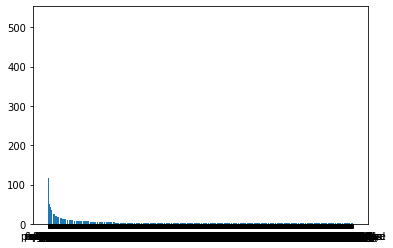

In [43]:
plt.bar(result.keys(), result.values())

In [44]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)
result_top_10 = result_top_10.to_dict()
result_top_10

{'amp': 527,
 'tesla': 291,
 'car': 121,
 '3': 116,
 'yes': 108,
 'good': 102,
 'model': 98,
 'like': 95,
 'would': 77,
 'people': 74}

<BarContainer object of 10 artists>

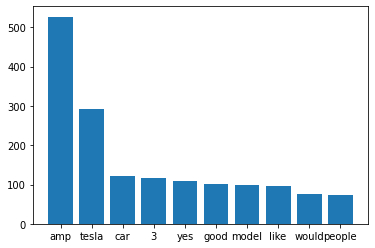

In [45]:
plt.bar(result_top_10.keys(), result_top_10.values())

[Text(0.5, 1.0, 'Word frequency for 2018 elon tweets')]

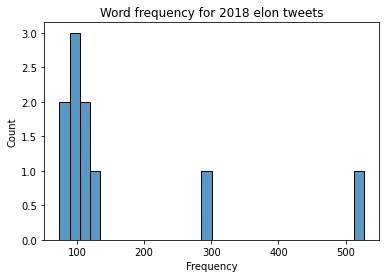

In [46]:
import seaborn as sns
word_freq_2018 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2018,bins=30).set(title="Word frequency for 2018 elon tweets")

In [47]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('thanks', 'tesla'), ('tesla', 'owners'), ('owners', 'china'), ('china', 'looking'), ('looking', 'forward'), ('forward', 'visiting'), ('visiting', 'soon'), ('soon', 'groundbreaking'), ('groundbreaking', 'gigafactory'), ('gigafactory', 'shanghai'), ('turns', 'take'), ('take', 'dayquil'), ('dayquil', 'exit'), ('exit', 'matrix'), ('excited', 'larry'), ('larry', 'ellison'), ('ellison', 'amp'), ('amp', 'kathleen'), ('kathleen', 'wilson'), ('wilson', 'thompson'), ('thompson', 'join'), ('join', 'tesla'), ('tesla', 'board'), ('tesla', 'team'), ('team', 'great'), ('great', 'job'), ('provide', 'detailed'), ('detailed', 'explanation'), ('explanation', 'march'), ('march', 'april'), ('time', 'although'), ('although', 'also'), ('also', 'turned'), ('turned', 'dramatically'), ('dramatically', 'better'), ('probability', '60'), ('60', 'amp'), ('amp', 'rising'), ('rising', 'rapidly'), ('rapidly', 'due'), ('due', 'new'), ('new', 'architecture'), ('coming', 'soon'), ('definitely',

In [48]:
bigram_counts = collections.Counter(res)

bigram_counts

Counter({('thanks', 'tesla'): 3,
         ('tesla', 'owners'): 9,
         ('owners', 'china'): 1,
         ('china', 'looking'): 1,
         ('looking', 'forward'): 2,
         ('forward', 'visiting'): 1,
         ('visiting', 'soon'): 1,
         ('soon', 'groundbreaking'): 1,
         ('groundbreaking', 'gigafactory'): 1,
         ('gigafactory', 'shanghai'): 1,
         ('turns', 'take'): 1,
         ('take', 'dayquil'): 1,
         ('dayquil', 'exit'): 1,
         ('exit', 'matrix'): 1,
         ('excited', 'larry'): 1,
         ('larry', 'ellison'): 1,
         ('ellison', 'amp'): 1,
         ('amp', 'kathleen'): 1,
         ('kathleen', 'wilson'): 1,
         ('wilson', 'thompson'): 1,
         ('thompson', 'join'): 1,
         ('join', 'tesla'): 1,
         ('tesla', 'board'): 2,
         ('tesla', 'team'): 11,
         ('team', 'great'): 2,
         ('great', 'job'): 1,
         ('provide', 'detailed'): 1,
         ('detailed', 'explanation'): 1,
         ('explanation', 'marc

In [49]:
new_dict = dict(bigram_counts)

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0          (thanks, tesla)      3
1          (tesla, owners)      9
2          (owners, china)      1
3         (china, looking)      1
4       (looking, forward)      2
...                    ...    ...
15716     (sierra, nevada)      1
15717  (nevada, mountains)      1
15718    (mountains, wild)      1
15719    (horses, roaming)      1
15720      (roaming, free)      1

[15721 rows x 2 columns]

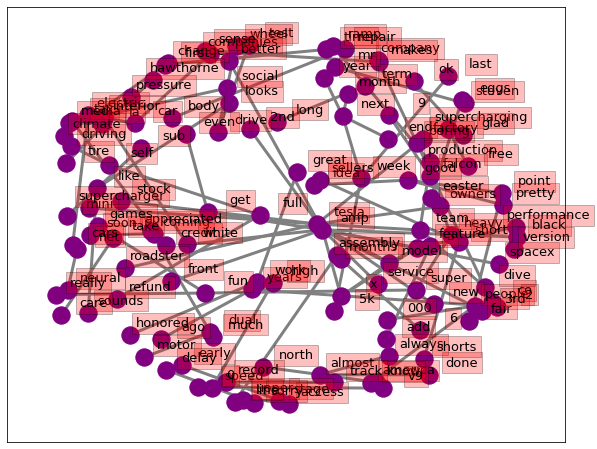

In [50]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [51]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)
sorted_df['Rank'] = sorted_df.index + 1
sorted_df

All Bigrams  Count   Rank
0             (model, 3)     74      1
1           (next, year)     25      2
2         (coming, soon)     22      3
3      (boring, company)     16      4
4        (falcon, heavy)     14      5
...                  ...    ...    ...
15716         (amp, fun)      1  15717
15717    (coming, month)      1  15718
15718        (month, v9)      1  15719
15719       (def, worth)      1  15720
15720    (roaming, free)      1  15721

[15721 rows x 3 columns]

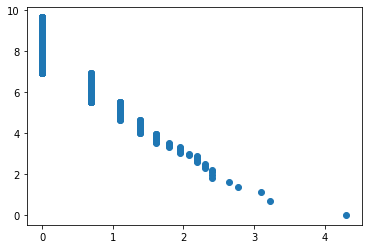

In [52]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

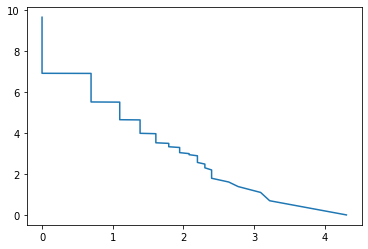

In [53]:
plt.plot(xlog, ylog)

## 2019

In [54]:
task_2019 = pd.read_csv('2019.csv')
task_2019['tweet'] = task_2019['tweet'].apply(removal)
task_2019

Unnamed: 0                   id      conversation_id    created_at  \
0              0  1211071324518531072  1210918835861241856  1.577577e+12   
1              1  1211069054779301894  1210918835861241856  1.577576e+12   
2              2  1211064937004589056  1210918835861241856  1.577575e+12   
3              3  1211054942192119808  1210918835861241856  1.577573e+12   
4              4  1211051740562366464  1210774027054145536  1.577572e+12   
...          ...                  ...                  ...           ...   
8307        8307   142881284019060736   142881284019060736  1.322901e+12   
8308        8308   142880871391838208   142880871391838208  1.322900e+12   
8309        8309   142188458125963264   142188458125963264  1.322735e+12   
8310        8310   142179928203460608   142179928203460608  1.322733e+12   
8311        8311          15434727182          15434727182  1.275676e+12   

                     date  timezone  place  \
0     2019-12-28 23:47:59         0    NaN   
1     2019-12-28 23:38:57         0    NaN   
2     2019-12-28 23:22:36         0    NaN   
3     2019-12-28 22:42:53         0    NaN   
4     2019-12-28 22:30:09         0    NaN   
...                   ...       ...    ...   
8307  2011-12-03 08:22:07         0    NaN   
8308  2011-12-03 08:20:28         0    NaN   
8309  2011-12-01 10:29:04         0    NaN   
8310  2011-12-01 09:55:11         0    NaN   
8311  2010-06-04 18:31:57         0    NaN   

                                                  tweet language hashtags  \
0           this is a pretty awful lie  i left south...       en       []   
1          this person blocked me  so can t read the...       en       []   
2          we started zip2 with   2k from me plus my...       en       []   
3         he didn t own an emerald mine  amp  i work...       en       []   
4                                           pretty much       en       []   
...                                                 ...      ...      ...   
8307                  that was a total non sequitur btw       en       []   
8308  great voltaire quote  arguably better than twa...       en       []   
8309  i made the volume on the model s   go to 11   ...       en       []   
8310  went to iceland on sat to ride bumper cars on ...       en       []   
8311  please ignore prior tweets  as that was someon...       en       []   

      ... geo  source  user_rt_id user_rt retweet_id  \
0     ... NaN     NaN         NaN     NaN        NaN   
1     ... NaN     NaN         NaN     NaN        NaN   
2     ... NaN     NaN         NaN     NaN        NaN   
3     ... NaN     NaN         NaN     NaN        NaN   
4     ... NaN     NaN         NaN     NaN        NaN   
...   ...  ..     ...         ...     ...        ...   
8307  ... NaN     NaN         NaN     NaN        NaN   
8308  ... NaN     NaN         NaN     NaN        NaN   
8309  ... NaN     NaN         NaN     NaN        NaN   
8310  ... NaN     NaN         NaN     NaN        NaN   
8311  ... NaN     NaN         NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'austinbarnard45', 'name': 'A...           NaN   
1     [{'screen_name': 'austinbarnard45', 'name': 'A...           NaN   
2     [{'screen_name': 'IrinaAntony', 'name': '✨⭐️✨'...           NaN   
3     [{'screen_name': 'tjq1190', 'name': 'Tyler J. ...           NaN   
4     [{'screen_name': 'geofficient', 'name': 'Geoff...           NaN   
...                                                 ...           ...   
8307                                                 []           NaN   
8308                                                 []           NaN   
8309                                                 []           NaN   
8310                                                 []           NaN   
8311                                                 []           NaN   

     translate trans_src trans_dest  
0          NaN       NaN   

In [55]:
words_list = task_2019.tweet.values.tolist()
new_df = pd.DataFrame(words_list)
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0           this is a pretty awful lie  i left south...   
1          this person blocked me  so can t read the...   
2          we started zip2 with   2k from me plus my...   
3         he didn t own an emerald mine  amp  i work...   
4                                           pretty much   
...                                                 ...   
8307                  that was a total non sequitur btw   
8308  great voltaire quote  arguably better than twa...   
8309  i made the volume on the model s   go to 11   ...   
8310  went to iceland on sat to ride bumper cars on ...   
8311  please ignore prior tweets  as that was someon...   

                                tweet_without_stopwords  
0     pretty awful lie left south africa 17 backpack...  
1                  person blocked read tweet whats deal  
2     started zip2 2k plus overclocked home built pc...  
3     emerald mine amp worked way college ending 100...  
4                                           pretty much  
...                                                 ...  
8307                             total non sequitur btw  
8308  great voltaire quote arguably better twain hea...  
8309  made volume model go 11 need work miniature st...  
8310  went iceland sat ride bumper cars ice country ...  
8311  please ignore prior tweets someone pretending ...  

[8312 rows x 2 columns]

In [56]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
result = result.to_dict()
result

{'amp': 1218,
 'tesla': 848,
 'yes': 393,
 'model': 373,
 'good': 358,
 'like': 315,
 '3': 291,
 'car': 287,
 'would': 273,
 'great': 243,
 'time': 224,
 'next': 222,
 'one': 213,
 'rocket': 209,
 'cars': 199,
 'people': 185,
 'much': 184,
 'high': 179,
 'year': 177,
 'first': 177,
 'also': 176,
 'spacex': 172,
 'soon': 171,
 '1': 170,
 'falcon': 167,
 'thanks': 164,
 'make': 164,
 'launch': 163,
 'need': 161,
 'true': 160,
 'right': 159,
 'yeah': 156,
 'get': 155,
 'new': 152,
 'better': 150,
 'coming': 148,
 '2': 147,
 'exactly': 146,
 'even': 144,
 'work': 142,
 'way': 141,
 'actually': 141,
 'sure': 140,
 'team': 140,
 'production': 139,
 'probably': 139,
 'us': 138,
 'love': 132,
 'maybe': 131,
 'many': 128,
 'really': 128,
 'years': 119,
 'week': 115,
 'space': 113,
 'long': 112,
 'mars': 112,
 'go': 111,
 'think': 110,
 'autopilot': 108,
 'going': 108,
 'still': 108,
 'x': 108,
 'software': 107,
 'starship': 106,
 'lot': 105,
 'best': 105,
 'almost': 104,
 'test': 103,
 'dragon'

<BarContainer object of 10138 artists>

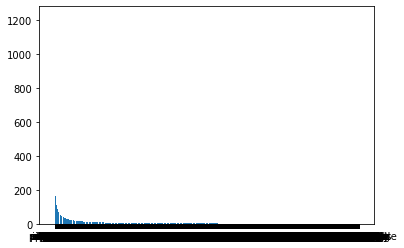

In [57]:
plt.bar(result.keys(), result.values())

In [58]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)
result_top_10 = result_top_10.to_dict()
result_top_10

{'amp': 1218,
 'tesla': 848,
 'yes': 393,
 'model': 373,
 'good': 358,
 'like': 315,
 '3': 291,
 'car': 287,
 'would': 273,
 'great': 243}

<BarContainer object of 10 artists>

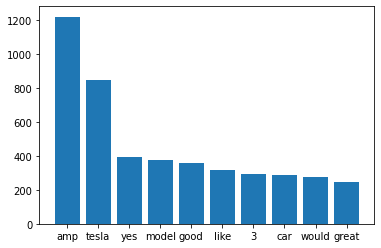

In [59]:
plt.bar(result_top_10.keys(), result_top_10.values())

[Text(0.5, 1.0, 'Word frequency for 2019 elon tweets')]

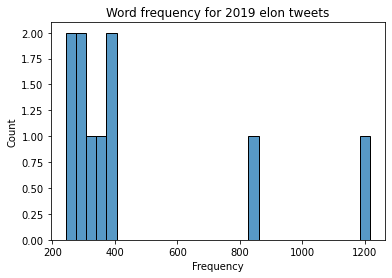

In [60]:
word_freq_2019 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2019,bins=30).set(title="Word frequency for 2019 elon tweets")

In [61]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('pretty', 'awful'), ('awful', 'lie'), ('lie', 'left'), ('left', 'south'), ('south', 'africa'), ('africa', '17'), ('17', 'backpack'), ('backpack', 'amp'), ('amp', 'suitcase'), ('suitcase', 'books'), ('books', 'worked'), ('worked', 'mom'), ('mom', 'cousin'), ('cousin', 'farm'), ('farm', 'saskatchewan'), ('saskatchewan', 'amp'), ('amp', 'lumber'), ('lumber', 'mill'), ('mill', 'vancouver'), ('vancouver', 'went'), ('went', 'queens'), ('queens', 'univ'), ('univ', 'scholarship'), ('scholarship', 'amp'), ('amp', 'debt'), ('debt', 'upenn'), ('upenn', 'wharton'), ('wharton', 'amp'), ('amp', 'stanford'), ('person', 'blocked'), ('blocked', 'read'), ('read', 'tweet'), ('tweet', 'whats'), ('whats', 'deal'), ('started', 'zip2'), ('zip2', '2k'), ('2k', 'plus'), ('plus', 'overclocked'), ('overclocked', 'home'), ('home', 'built'), ('built', 'pc'), ('pc', '5k'), ('5k', 'bro'), ('bro', 'amp'), ('amp', '8k'), ('8k', 'greg'), ('greg', 'kouri'), ('kouri', 'good'), ('good', 'guy'), 

In [62]:
bigram_counts = collections.Counter(res)

new_dict = dict(bigram_counts)

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0             (pretty, awful)      1
1                (awful, lie)      1
2                 (lie, left)      1
3               (left, south)      1
4             (south, africa)      2
...                       ...    ...
48153         (ignore, prior)      1
48154         (prior, tweets)      1
48155       (tweets, someone)      1
48156   (someone, pretending)      1
48157  (pretending, actually)      1

[48158 rows x 2 columns]

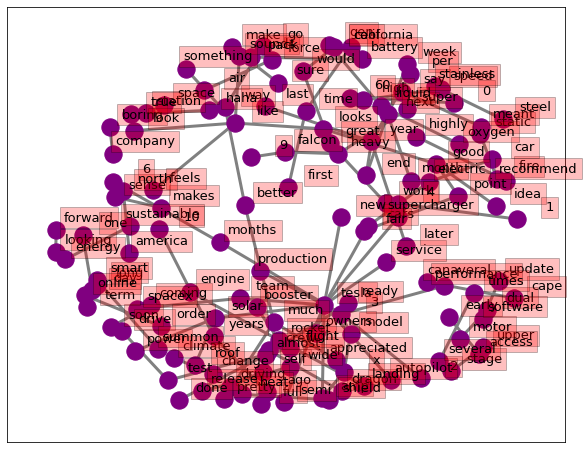

In [63]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [64]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)
sorted_df['Rank'] = sorted_df.index + 1
sorted_df

All Bigrams  Count   Rank
0                  (model, 3)    163      1
1                 (falcon, 9)     69      2
2              (coming, soon)     69      3
3                (next, year)     53      4
4                (next, week)     44      5
...                       ...    ...    ...
48153          (body, design)      1  48154
48154         (design, could)      1  48155
48155             (def, less)      1  48156
48156         (less, complex)      1  48157
48157  (pretending, actually)      1  48158

[48158 rows x 3 columns]

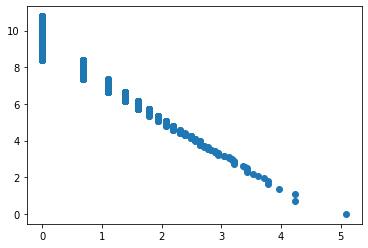

In [65]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

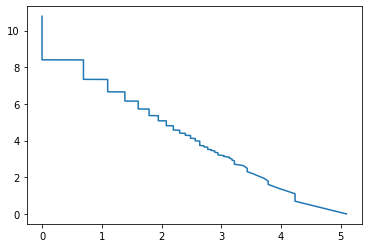

In [66]:
plt.plot(xlog, ylog)

## 2020

In [67]:
task_2020 = pd.read_csv('2020.csv')
task_2020['tweet'] = task_2020['tweet'].apply(removal)
task_2020

Unnamed: 0                   id      conversation_id    created_at  \
0               0  1343644462036086785  1343320495127633920  1.609185e+12   
1               1  1343619610617077760  1343386617294295040  1.609179e+12   
2               2  1343608616960491521  1343576442722893825  1.609176e+12   
3               3  1343608530998153222  1343320495127633920  1.609176e+12   
4               4  1343431408052662273  1343043963096326147  1.609134e+12   
...           ...                  ...                  ...           ...   
11712       11712   142881284019060736   142881284019060736  1.322901e+12   
11713       11713   142880871391838208   142880871391838208  1.322900e+12   
11714       11714   142188458125963264   142188458125963264  1.322735e+12   
11715       11715   142179928203460608   142179928203460608  1.322733e+12   
11716       11716          15434727182          15434727182  1.275676e+12   

                      date  timezone  place  \
0      2020-12-28 19:46:18         0    NaN   
1      2020-12-28 18:07:33         0    NaN   
2      2020-12-28 17:23:51         0    NaN   
3      2020-12-28 17:23:31         0    NaN   
4      2020-12-28 05:39:42         0    NaN   
...                    ...       ...    ...   
11712  2011-12-03 08:22:07         0    NaN   
11713  2011-12-03 08:20:28         0    NaN   
11714  2011-12-01 10:29:04         0    NaN   
11715  2011-12-01 09:55:11         0    NaN   
11716  2010-06-04 18:31:57         0    NaN   

                                                   tweet language hashtags  \
0      entertainment will be critical when cars drive...       en       []   
1       just meeting with larry ellison to seek some ...       en       []   
2                                             absolutely       en       []   
3      what should tesla do with in car gaming in an ...       en       []   
4                                             absolutely       en       []   
...                                                  ...      ...      ...   
11712                  that was a total non sequitur btw       en       []   
11713  great voltaire quote  arguably better than twa...       en       []   
11714  i made the volume on the model s   go to 11   ...       en       []   
11715  went to iceland on sat to ride bumper cars on ...       en       []   
11716  please ignore prior tweets  as that was someon...       en       []   

       ... geo  source  user_rt_id user_rt retweet_id  \
0      ... NaN     NaN         NaN     NaN        NaN   
1      ... NaN     NaN         NaN     NaN        NaN   
2      ... NaN     NaN         NaN     NaN        NaN   
3      ... NaN     NaN         NaN     NaN        NaN   
4      ... NaN     NaN         NaN     NaN        NaN   
...    ...  ..     ...         ...     ...        ...   
11712  ... NaN     NaN         NaN     NaN        NaN   
11713  ... NaN     NaN         NaN     NaN        NaN   
11714  ... NaN     NaN         NaN     NaN        NaN   
11715  ... NaN     NaN         NaN     NaN        NaN   
11716  ... NaN     NaN         NaN     NaN        NaN   

                                                reply_to  retweet_date  \
0                                                     []           NaN   
1      [{'screen_name': 'kimpaquette', 'name': 'Kim P...           NaN   
2      [{'screen_name': 'richierichhhhh_', 'name': 'R...           NaN   
3                                                     []           NaN   
4      [{'screen_name': 'PPathole', 'name': 'Pranay P...           NaN   
...                                                  ...           ...   
11712                                                 []           NaN   
11713                                                 []           NaN   
11714                                                 []           NaN   
11715                                                 []           NaN   
11716                                                 []           NaN   

      

In [68]:
words_list = task_2020.tweet.values.tolist()
new_df = pd.DataFrame(words_list)
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0      entertainment will be critical when cars drive...   
1       just meeting with larry ellison to seek some ...   
2                                             absolutely   
3      what should tesla do with in car gaming in an ...   
4                                             absolutely   
...                                                  ...   
11712                  that was a total non sequitur btw   
11713  great voltaire quote  arguably better than twa...   
11714  i made the volume on the model s   go to 11   ...   
11715  went to iceland on sat to ride bumper cars on ...   
11716  please ignore prior tweets  as that was someon...   

                                 tweet_without_stopwords  
0                      entertainment critical cars drive  
1      meeting larry ellison seek advice back working...  
2                                             absolutely  
3                      tesla car gaming autonomous world  
4                                             absolutely  
...                                                  ...  
11712                             total non sequitur btw  
11713  great voltaire quote arguably better twain hea...  
11714  made volume model go 11 need work miniature st...  
11715  went iceland sat ride bumper cars ice country ...  
11716  please ignore prior tweets someone pretending ...  

[11717 rows x 2 columns]

In [69]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
result = result.to_dict()
result

{'amp': 1822,
 'tesla': 1049,
 'yes': 554,
 'good': 471,
 'model': 403,
 'like': 395,
 'great': 372,
 'would': 369,
 '3': 343,
 'car': 329,
 'much': 310,
 'one': 291,
 'time': 283,
 'high': 272,
 'next': 268,
 'also': 257,
 'people': 254,
 'rocket': 244,
 'yeah': 242,
 'true': 239,
 'soon': 235,
 'make': 234,
 'sure': 230,
 'year': 229,
 'cars': 227,
 'need': 224,
 'spacex': 223,
 'new': 221,
 'first': 219,
 'right': 214,
 'probably': 214,
 '1': 211,
 'production': 210,
 'get': 210,
 'thanks': 210,
 'better': 207,
 'exactly': 206,
 'even': 203,
 'work': 199,
 'launch': 199,
 'coming': 195,
 'many': 195,
 '2': 191,
 'team': 189,
 'way': 186,
 'us': 186,
 'maybe': 185,
 'falcon': 185,
 'actually': 182,
 'starship': 174,
 'years': 173,
 'mars': 165,
 'lot': 161,
 'long': 160,
 'think': 156,
 'still': 155,
 'really': 154,
 'test': 154,
 'could': 153,
 'haha': 152,
 'best': 150,
 'love': 148,
 'almost': 147,
 'super': 146,
 'going': 143,
 'point': 143,
 'week': 142,
 '5': 141,
 'go': 139,
 

<BarContainer object of 11877 artists>

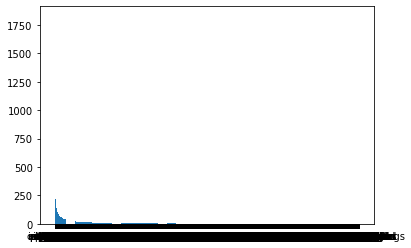

In [70]:
plt.bar(result.keys(), result.values())

In [71]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)
result_top_10 = result_top_10.to_dict()
result_top_10

{'amp': 1822,
 'tesla': 1049,
 'yes': 554,
 'good': 471,
 'model': 403,
 'like': 395,
 'great': 372,
 'would': 369,
 '3': 343,
 'car': 329}

<BarContainer object of 10 artists>

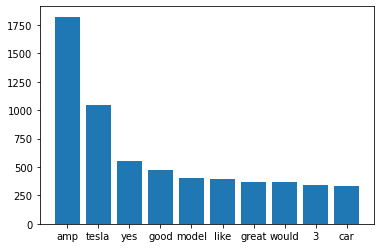

In [72]:
plt.bar(result_top_10.keys(), result_top_10.values())

[Text(0.5, 1.0, 'Word frequency for 2020 elon tweets')]

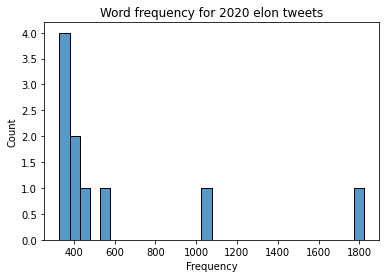

In [73]:
word_freq_2020 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2020,bins=30).set(title="Word frequency for 2020 elon tweets")

In [74]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('entertainment', 'critical'), ('critical', 'cars'), ('cars', 'drive'), ('meeting', 'larry'), ('larry', 'ellison'), ('ellison', 'seek'), ('seek', 'advice'), ('advice', 'back'), ('back', 'working'), ('working', 'tesla'), ('tesla', 'end'), ('end', 'quarter'), ('quarter', 'tomorrow'), ('tesla', 'car'), ('car', 'gaming'), ('gaming', 'autonomous'), ('autonomous', 'world'), ('taste', 'future'), ('try', 'playing'), ('playing', 'polytopia'), ('polytopia', 'tesla'), ('tesla', 'great'), ('great', 'game'), ('game', 'multiplayer'), ('multiplayer', 'online'), ('online', 'version'), ('version', 'coming'), ('coming', 'soon'), ('focus', 'making'), ('making', 'products'), ('products', 'amp'), ('amp', 'services'), ('services', 'people'), ('people', 'truly'), ('truly', 'love'), ('love', 'total'), ('total', 'economic'), ('economic', 'pie'), ('pie', 'bigger'), ('bigger', 'instead'), ('instead', 'engaging'), ('engaging', 'zero'), ('zero', 'sum'), ('sum', 'negative'), ('negative', '

In [75]:
bigram_counts = collections.Counter(res)

new_dict = dict(bigram_counts)

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0      (entertainment, critical)      1
1               (critical, cars)      1
2                  (cars, drive)      1
3               (meeting, larry)      1
4               (larry, ellison)      2
...                          ...    ...
63863              (family, fun)      1
63864            (ignore, prior)      1
63865          (tweets, someone)      1
63866      (someone, pretending)      1
63867     (pretending, actually)      1

[63868 rows x 2 columns]

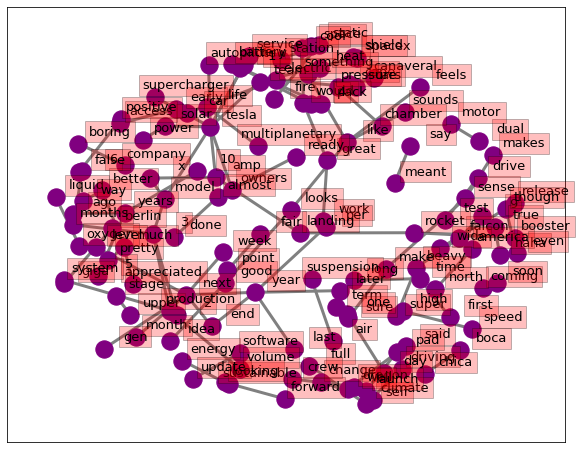

In [76]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [77]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)
sorted_df['Rank'] = sorted_df.index + 1
sorted_df

All Bigrams  Count   Rank
0                  (model, 3)    173      1
1              (coming, soon)     88      2
2                 (falcon, 9)     73      3
3                (next, year)     60      4
4                (next, week)     54      5
...                       ...    ...    ...
63863           (make, candy)      1  63864
63864           (best, guide)      1  63865
63865            (guide, far)      1  63866
63866      (dojo, difference)      1  63867
63867  (pretending, actually)      1  63868

[63868 rows x 3 columns]

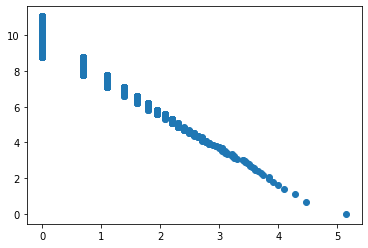

In [78]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

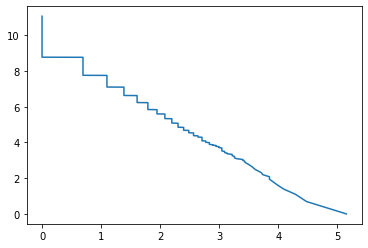

In [79]:
plt.plot(xlog, ylog)

## 2021

In [80]:
task_2021 = pd.read_csv('2021.csv')
task_2021['tweet'] = task_2021['tweet'].apply(removal)
task_2021

id      conversation_id  \
0     1476662222617251846  1476620230692679680   
1     1476656306610216960  1476644467578859528   
2     1476651519986614281  1476252898115964928   
3     1476619907076923398  1476252898115964928   
4     1476618021024190474  1476252898115964928   
...                   ...                  ...   
3110  1345384139969552389  1345382294966571008   
3111  1345382294966571008  1345382294966571008   
3112  1345344958710992897  1345334831719337984   
3113  1345208391958888448  1344675033231237120   
3114  1344810193952014336  1344518758707113986   

                                     created_at        date      time  \
0     2021-12-31 01:11:23 Arabian Standard Time  2021-12-31  01:11:23   
1     2021-12-31 00:47:53 Arabian Standard Time  2021-12-31  00:47:53   
2     2021-12-31 00:28:51 Arabian Standard Time  2021-12-31  00:28:51   
3     2021-12-30 22:23:14 Arabian Standard Time  2021-12-30  22:23:14   
4     2021-12-30 22:15:45 Arabian Standard Time  2021-12-30  22:15:45   
...                                         ...         ...       ...   
3110  2021-01-02 18:59:09 Arabian Standard Time  2021-01-02  18:59:09   
3111  2021-01-02 18:51:49 Arabian Standard Time  2021-01-02  18:51:49   
3112  2021-01-02 16:23:28 Arabian Standard Time  2021-01-02  16:23:28   
3113  2021-01-02 07:20:48 Arabian Standard Time  2021-01-02  07:20:48   
3114  2021-01-01 04:58:30 Arabian Standard Time  2021-01-01  04:58:30   

      timezone   user_id  username       name  place  ... geo source  \
0          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
2          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
4          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
...        ...       ...       ...        ...    ...  ...  ..    ...   
3110       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3111       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3112       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3113       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3114       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   

     user_rt_id user_rt retweet_id  \
0           NaN     NaN        NaN   
1           NaN     NaN        NaN   
2           NaN     NaN        NaN   
3           NaN     NaN        NaN   
4           NaN     NaN        NaN   
...         ...     ...        ...   
3110        NaN     NaN        NaN   
3111        NaN     NaN        NaN   
3112        NaN     NaN        NaN   
3113        NaN     NaN        NaN   
3114        NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'roshanpateI', 'name': 'Rosha...           NaN   
1     [{'screen_name': 'tesla_raj', 'name': 'Tesla R...           NaN   
2     [{'screen_name': 'CSmithson80', 'name': 'Chris...           NaN   
3     [{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...           NaN   
4     [{'screen_name': 'mims', 'name': 'Christopher ...           NaN   
...                                                 ...           ...   
3110  [{'screen_name': 'flcnhvy', 'name': 'Viv ✶', '...           NaN   
3111                                                 []           NaN   
3112  [{'screen_name': 'newscientist', 'name': 'New ...           NaN   
3113  [{'screen_name': 'comma_ai', 'name': 'comma', ...           NaN   
3114  [{'screen_name': 'PPathole', 'name': 'Pranay P...           NaN   

      translate trans_src trans_dest  
0           NaN       NaN        NaN  
1           NaN       NaN        NaN  
2           NaN       NaN        NaN  
3           NaN       NaN        NaN  
4           NaN       NaN        NaN  
...         ...       ...        ...  
3110        NaN       NaN        NaN  
3111        NaN       NaN        N

In [81]:
words_list = task_2021.tweet.values.tolist()
new_df = pd.DataFrame(words_list)
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0                                                     7   
1                           many ui improvements coming   
2                              this chart is a big deal   
3       predicting macroeconomics is challenging  to...   
4      if history is any guide  not many will make i...   
...                                                 ...   
3110   tesla is responsible for 2 3 of all the perso...   
3111  so proud of the tesla team for achieving this ...   
3112   um  we have giant fusion reactor in the sky t...   
3113   tesla full self driving will work at a safety...   
3114   dojo isn t needed  but will make self driving...   

                                tweet_without_stopwords  
0                                                     7  
1                           many ui improvements coming  
2                                        chart big deal  
3     predicting macroeconomics challenging say leas...  
4           history guide many make past next recession  
...                                                 ...  
3110  tesla responsible 2 3 personal amp professiona...  
3111  proud tesla team achieving major milestone sta...  
3112      um giant fusion reactor sky works maintenance  
3113  tesla full self driving work safety level well...  
3114  dojo needed make self driving better enough sa...  

[3115 rows x 2 columns]

In [82]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
result = result.to_dict()
result

{'amp': 476,
 'tesla': 213,
 'great': 102,
 'good': 98,
 'much': 93,
 'like': 89,
 'haha': 89,
 'would': 89,
 'time': 86,
 'beta': 77,
 'high': 74,
 'true': 73,
 'work': 73,
 'yes': 72,
 'next': 71,
 '10': 70,
 'production': 69,
 'year': 67,
 '2': 66,
 'fsd': 66,
 'one': 65,
 'make': 64,
 'starship': 64,
 'spacex': 59,
 'booster': 59,
 'hard': 58,
 'new': 55,
 'long': 55,
 'people': 55,
 'mars': 55,
 'car': 55,
 'probably': 54,
 'many': 54,
 'even': 53,
 'yeah': 53,
 'doge': 51,
 'still': 50,
 'cars': 50,
 'lot': 49,
 'get': 49,
 'also': 48,
 'earth': 47,
 '1': 47,
 'need': 46,
 'soon': 46,
 'way': 45,
 'needed': 45,
 'launch': 45,
 'first': 45,
 'real': 44,
 'maybe': 42,
 'coming': 41,
 'orbit': 41,
 'years': 41,
 'actually': 41,
 'us': 41,
 'ai': 40,
 'software': 40,
 'use': 40,
 'engine': 39,
 'ship': 39,
 'exactly': 39,
 'driving': 38,
 'team': 38,
 'super': 38,
 '3': 38,
 'rocket': 37,
 'better': 37,
 'week': 36,
 'back': 35,
 'well': 34,
 'best': 34,
 'day': 34,
 'sure': 33,
 'li

<BarContainer object of 5159 artists>

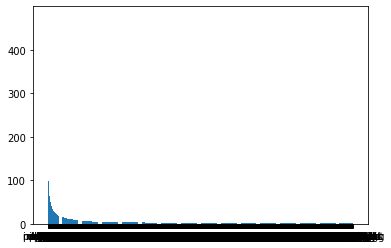

In [83]:
plt.bar(result.keys(), result.values())

In [84]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)
result_top_10 = result_top_10.to_dict()
result_top_10

{'amp': 476,
 'tesla': 213,
 'great': 102,
 'good': 98,
 'much': 93,
 'like': 89,
 'haha': 89,
 'would': 89,
 'time': 86,
 'beta': 77}

<BarContainer object of 10 artists>

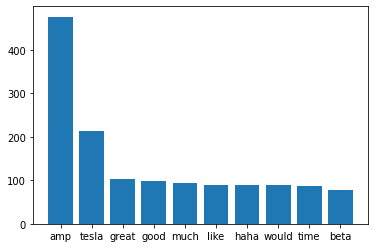

In [85]:
plt.bar(result_top_10.keys(), result_top_10.values())

[Text(0.5, 1.0, 'Word frequency for 2021 elon tweets')]

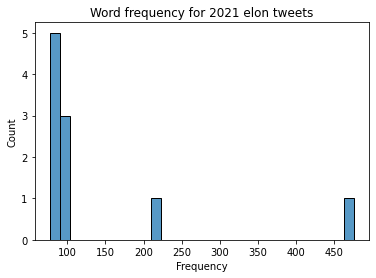

In [86]:
word_freq_2021 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2021,bins=30).set(title="Word frequency for 2021 elon tweets")

In [87]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('many', 'ui'), ('ui', 'improvements'), ('improvements', 'coming'), ('chart', 'big'), ('big', 'deal'), ('predicting', 'macroeconomics'), ('macroeconomics', 'challenging'), ('challenging', 'say'), ('say', 'least'), ('least', 'gut'), ('gut', 'feel'), ('feel', 'maybe'), ('maybe', 'around'), ('around', 'spring'), ('spring', 'summer'), ('summer', '2022'), ('2022', 'later'), ('later', '2023'), ('history', 'guide'), ('guide', 'many'), ('many', 'make'), ('make', 'past'), ('past', 'next'), ('next', 'recession'), ('probably', 'wrong'), ('wow', 'working'), ('working', 'problem'), ('problem', 'soaked'), ('soaked', 'lot'), ('lot', 'time'), ('time', 'amp'), ('amp', 'brain'), ('brain', 'cycles'), ('cycles', 'past'), ('past', '7'), ('7', 'years'), ('years', 'starship'), ('starship', 'engines'), ('engines', 'currently'), ('currently', 'two'), ('two', 'hardest'), ('hardest', 'problems'), ('ashok', 'first'), ('first', 'person'), ('person', 'recruited'), ('recruited', 'tweet'), (

In [88]:
bigram_counts = collections.Counter(res)

new_dict = dict(bigram_counts)

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0                   (many, ui)      1
1           (ui, improvements)      1
2       (improvements, coming)      3
3                 (chart, big)      1
4                  (big, deal)      5
...                        ...    ...
15657     (drivers, autopilot)      1
15658  (autopilot, ultimately)      1
15659      (ultimately, needs)      1
15660              (needs, 10)      1
15661           (times, safer)      1

[15662 rows x 2 columns]

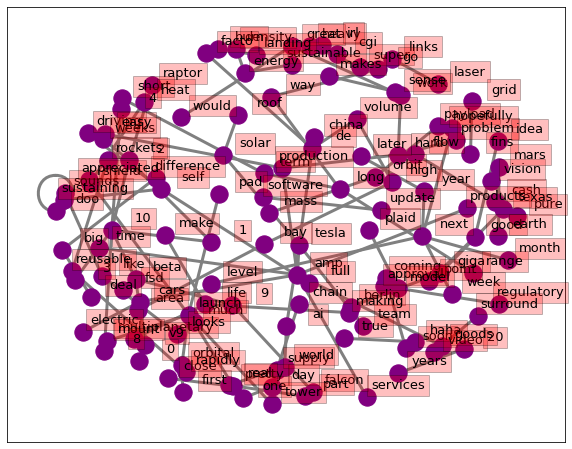

In [89]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [90]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)
sorted_df['Rank'] = sorted_df.index + 1
sorted_df

All Bigrams  Count   Rank
0                 (fsd, beta)     20      1
1                (long, term)     19      2
2              (pure, vision)     16      3
3             (self, driving)     16      4
4      (life, multiplanetary)     16      5
...                       ...    ...    ...
15657        (launch, dragon)      1  15658
15658      (flying, starbase)      1  15659
15659             (yeah, tie)      1  15660
15660        (tie, autopilot)      1  15661
15661          (times, safer)      1  15662

[15662 rows x 3 columns]

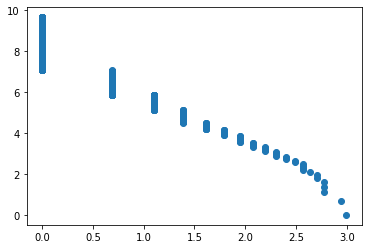

In [91]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

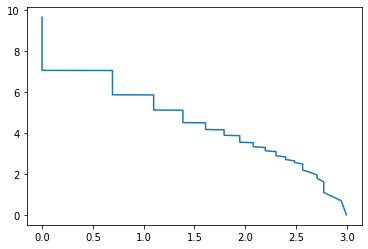

In [92]:
plt.plot(xlog, ylog)

## 2022

In [93]:
task_2022 = pd.read_csv('2022.csv')
task_2022['tweet'] = task_2022['tweet'].apply(removal)
task_2022

id      conversation_id  \
0     1500030191837589510  1499972826828259328   
1     1500028396436340736  1499802655421448192   
2     1500026380704178178  1499972826828259328   
3     1500010328758923264  1499976967105433600   
4     1499982913949081600  1499976967105433600   
...                   ...                  ...   
1023  1477775713172402176  1477775713172402176   
1024  1477706142461706248  1477706142461706248   
1025  1477700424933253123  1477700424933253123   
1026  1477096955658579974  1476958174439567360   
1027  1477080438049058818  1476768985509212162   

                                     created_at        date      time  \
0     2022-03-05 12:47:21 Arabian Standard Time  2022-03-05  12:47:21   
1     2022-03-05 12:40:13 Arabian Standard Time  2022-03-05  12:40:13   
2     2022-03-05 12:32:12 Arabian Standard Time  2022-03-05  12:32:12   
3     2022-03-05 11:28:25 Arabian Standard Time  2022-03-05  11:28:25   
4     2022-03-05 09:39:29 Arabian Standard Time  2022-03-05  09:39:29   
...                                         ...         ...       ...   
1023  2022-01-03 02:56:00 Arabian Standard Time  2022-01-03  02:56:00   
1024  2022-01-02 22:19:33 Arabian Standard Time  2022-01-02  22:19:33   
1025  2022-01-02 21:56:50 Arabian Standard Time  2022-01-02  21:56:50   
1026  2022-01-01 05:58:52 Arabian Standard Time  2022-01-01  05:58:52   
1027  2022-01-01 04:53:13 Arabian Standard Time  2022-01-01  04:53:13   

      timezone   user_id  username       name  place  ... geo source  \
0          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
2          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
3          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
4          400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
...        ...       ...       ...        ...    ...  ...  ..    ...   
1023       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1024       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1025       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1026       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   
1027       400  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN   

     user_rt_id user_rt retweet_id  \
0           NaN     NaN        NaN   
1           NaN     NaN        NaN   
2           NaN     NaN        NaN   
3           NaN     NaN        NaN   
4           NaN     NaN        NaN   
...         ...     ...        ...   
1023        NaN     NaN        NaN   
1024        NaN     NaN        NaN   
1025        NaN     NaN        NaN   
1026        NaN     NaN        NaN   
1027        NaN     NaN        NaN   

                                               reply_to  retweet_date  \
0     [{'screen_name': 'SpacePadreIsle', 'name': 'SP...           NaN   
1     [{'screen_name': 'teslaownersSV', 'name': 'Tes...           NaN   
2     [{'screen_name': 'SpacePadreIsle', 'name': 'SP...           NaN   
3     [{'screen_name': 'RationalEtienne', 'name': 'P...           NaN   
4     [{'screen_name': 'RogerYar', 'name': 'Дід Пана...           NaN   
...                                                 ...           ...   
1023                                                 []           NaN   
1024                                                 []           NaN   
1025                                                 []           NaN   
1026  [{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...           NaN   
1027  [{'screen_name': 'MiFSDBetaTester', 'name': 'R...           NaN   

      translate trans_src trans_dest  
0           NaN       NaN        NaN  
1           NaN       NaN        NaN  
2           NaN       NaN        NaN  
3           NaN       NaN        NaN  
4           NaN       NaN        NaN  
...         ...       ...        ...  
1023        NaN       NaN        NaN  
1024        NaN       NaN        N

In [94]:
words_list = task_2022.tweet.values.tolist()
new_df = pd.DataFrame(words_list)
new_df.columns = ["tweet"]
new_df['tweet_without_stopwords'] = new_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))
new_df

tweet  \
0                        in a way  this is free qa haha   
1                             a beautiful home for life   
2      some starlink terminals near conflict areas w...   
3                                               exactly   
4      all news sources are partially propaganda  so...   
...                                                 ...   
1023                                                      
1024                let s make the roaring 20 s happen    
1025                great work by tesla team worldwide    
1026                                                      
1027                                                      

                                tweet_without_stopwords  
0                                      way free qa haha  
1                                   beautiful home life  
2     starlink terminals near conflict areas jammed ...  
3                                               exactly  
4              news sources partially propaganda others  
...                                                 ...  
1023                                                     
1024                         let make roaring 20 happen  
1025                    great work tesla team worldwide  
1026                                                     
1027                                                     

[1028 rows x 2 columns]

In [95]:
result = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
result = result.to_dict()
result

{'amp': 80,
 'tesla': 62,
 'people': 34,
 'would': 32,
 'yes': 32,
 'one': 30,
 'starlink': 28,
 'good': 28,
 'car': 26,
 'true': 22,
 'high': 22,
 'great': 22,
 'like': 20,
 'make': 20,
 'time': 20,
 'many': 18,
 'much': 18,
 'hard': 18,
 'exactly': 18,
 'yeah': 18,
 'life': 18,
 'cars': 16,
 'next': 16,
 'starship': 16,
 'made': 16,
 'fsd': 16,
 'model': 14,
 'actually': 14,
 'year': 14,
 'x': 14,
 'lot': 14,
 'spacex': 14,
 'work': 14,
 'long': 14,
 'real': 14,
 'working': 14,
 'well': 14,
 'future': 14,
 'software': 14,
 'earth': 14,
 'area': 14,
 'maybe': 14,
 'still': 14,
 'ai': 12,
 'big': 12,
 'better': 12,
 'orbit': 12,
 'right': 12,
 'think': 12,
 'production': 12,
 'enough': 12,
 '2': 12,
 'world': 12,
 'given': 12,
 'way': 12,
 'see': 12,
 'ukraine': 12,
 'week': 12,
 'us': 12,
 'mars': 10,
 'even': 10,
 'sure': 10,
 'pretty': 10,
 'yup': 10,
 'changes': 10,
 'know': 10,
 'antenna': 10,
 'use': 10,
 'moving': 10,
 'say': 10,
 'company': 10,
 'new': 10,
 'almost': 10,
 'prob

<BarContainer object of 1501 artists>

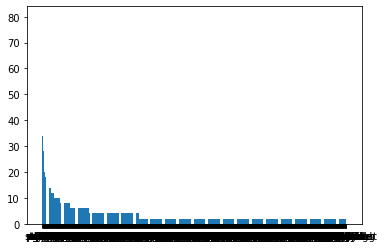

In [96]:
plt.bar(result.keys(), result.values())

In [97]:
result_top_10 = new_df.tweet_without_stopwords.str.split(expand=True).stack().value_counts().head(10)
result_top_10 = result_top_10.to_dict()
result_top_10

{'amp': 80,
 'tesla': 62,
 'people': 34,
 'would': 32,
 'yes': 32,
 'one': 30,
 'starlink': 28,
 'good': 28,
 'car': 26,
 'true': 22}

<BarContainer object of 10 artists>

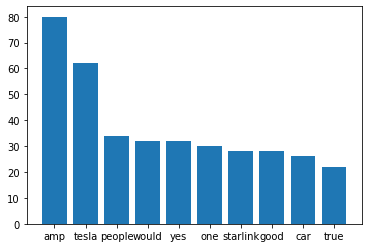

In [98]:
plt.bar(result_top_10.keys(), result_top_10.values())

[Text(0.5, 1.0, 'Word frequency for 2022 elon tweets')]

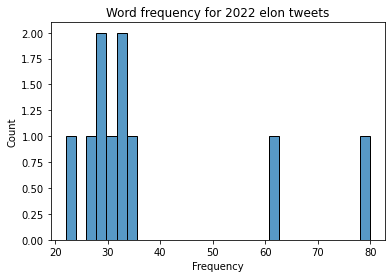

In [99]:
word_freq_2022 = pd.DataFrame(list(result_top_10.items()),columns = ['Word','Frequency']) 
sns.histplot(x='Frequency',data=word_freq_2022,bins=30).set(title="Word frequency for 2022 elon tweets")

In [100]:
bigrams_list = new_df['tweet_without_stopwords'].tolist()

res = [(x, i.split()[j + 1]) for i in bigrams_list 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 1]
  
print ("The formed bigrams are : " + str(res))

The formed bigrams are : [('way', 'free'), ('free', 'qa'), ('qa', 'haha'), ('beautiful', 'home'), ('home', 'life'), ('starlink', 'terminals'), ('terminals', 'near'), ('near', 'conflict'), ('conflict', 'areas'), ('areas', 'jammed'), ('jammed', 'several'), ('several', 'hours'), ('hours', 'time'), ('time', 'latest'), ('latest', 'software'), ('software', 'update'), ('update', 'bypasses'), ('bypasses', 'jamming'), ('jamming', 'curious'), ('curious', 'see'), ('see', 'next'), ('news', 'sources'), ('sources', 'partially'), ('partially', 'propaganda'), ('propaganda', 'others'), ('starlink', 'told'), ('told', 'governments'), ('governments', 'ukraine'), ('ukraine', 'block'), ('block', 'russian'), ('russian', 'news'), ('news', 'sources'), ('sources', 'unless'), ('unless', 'gunpoint'), ('gunpoint', 'sorry'), ('sorry', 'free'), ('free', 'speech'), ('speech', 'absolutist'), ('spacex', 'reprioritized'), ('reprioritized', 'cyber'), ('cyber', 'defense'), ('defense', 'amp'), ('amp', 'overcoming'), ('over

In [101]:
bigram_counts = collections.Counter(res)

new_dict = dict(bigram_counts)

all_bigrams_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index()
all_bigrams_df.columns = ['All Bigrams', 'Count']
  
all_bigrams_df

All Bigrams  Count
0           (way, free)      2
1            (free, qa)      2
2            (qa, haha)      2
3     (beautiful, home)      2
4          (home, life)      2
...                 ...    ...
2195    (make, roaring)      2
2196      (roaring, 20)      2
2197       (20, happen)      2
2198      (great, work)      2
2199  (team, worldwide)      2

[2200 rows x 2 columns]

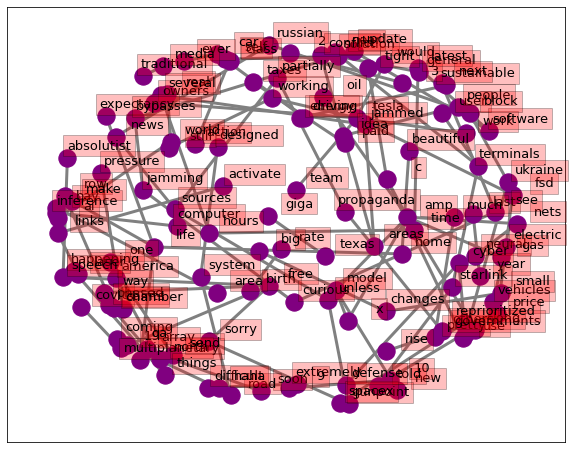

In [102]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100), columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')

G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

nx.draw_networkx(G, pos, font_size=16, width=3, edge_color='grey', node_color='purple', with_labels = False, ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25), horizontalalignment='center', fontsize=13)
    
plt.show()

In [103]:
sorted_df = all_bigrams_df.sort_values(by = 'Count',ascending = False, ignore_index = True)
sorted_df['Rank'] = sorted_df.index + 1
sorted_df

All Bigrams  Count  Rank
0             (birth, rate)      8     1
1              (last, year)      6     2
2               (covid, 19)      6     3
3     (sustainable, energy)      6     4
4            (neural, nets)      6     5
...                     ...    ...   ...
2195  (changes, unexpected)      2  2196
2196       (reversing, big)      2  2197
2197       (two, reversing)      2  2198
2198             (day, two)      2  2199
2199      (team, worldwide)      2  2200

[2200 rows x 3 columns]

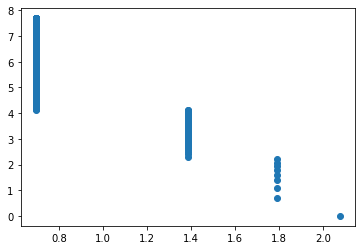

In [104]:
xlog = np.log(sorted_df.Count)
ylog = np.log(sorted_df.Rank)

plt.scatter(xlog, ylog)

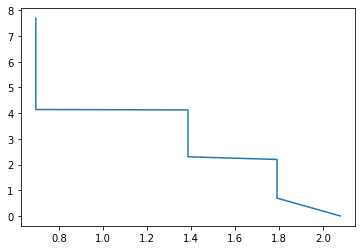

In [105]:
plt.plot(xlog, ylog)